# Model Tuning

## Table of Contents
1. [Import Libraries and Data](#import-libraries-and-data)
2. [Model Tuning](#model-tuning)
    - 2.1. [Hyperparameter Tuning for KNN](#tuning-knn)
    - 2.2. [Re-evaluating the Model after Tuning](#reevaluate)
    - 2.3. [Saving the Best Tuning Model](#save-tuned-model)

## 1. Import Libraries and Data

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer, recall_score
import joblib

In [27]:
X_train = pd.read_csv('../../data/processed/X_train_scaled.csv')
X_test = pd.read_csv('../../data/processed/X_test_scaled.csv')
y_train = pd.read_csv('../../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../../data/processed/y_test.csv').values.ravel()

## 2. Model Tuning <a id="model-tuning"></a>

- Table of Contents:
    1. Hyperparameter Tuning for KNN (GridSearchCV)
    2. Re-evaluating the Model after Tuning
    3. Saving the Best Model

### 2.1. Hyperparameter Tuning for KNN (GridSearchCV) <a id="tuning-knn"></a>

- Tìm kiếm giá trị tối ưu của những tham số không được học trực tiếp từ dữ liệu trong quá trình huấn luyện.
- Với mô hình KNN thì các siêu tham số tiêu biểu gồm:
    - n_neigbors : Số lượng "hàng xóm gần nhất".
    - weights : Cách tính trọng số.
    - metric : Khoảng cách dùng để đo độ gần.
- Sử dụng RandomizedSearchCV ta tìm ra được tổ hợp hyperparameter tốt nhất.

In [100]:
param_dist = {
    'n_neighbors' : list(range(1, 30)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'minkowski', 'manhattan', 'chebyshev']
}

recall_scorer = make_scorer(recall_score, pos_label=1)

random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=40,
    scoring=recall_scorer,
    cv=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

print(f"Best params: {random_search.best_params_}")
print(f"Best cross-val F1: {random_search.best_score_}")

best_knn = random_search.best_estimator_

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best params: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean'}
Best cross-val F1: 0.5316017316017315
Best params: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean'}
Best cross-val F1: 0.5316017316017315


### 2.2. Re-evaluating the Model after Tuning <a id="reevaluate"></a>

Accuracy: 0.7727, F1-score: 0.7395
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



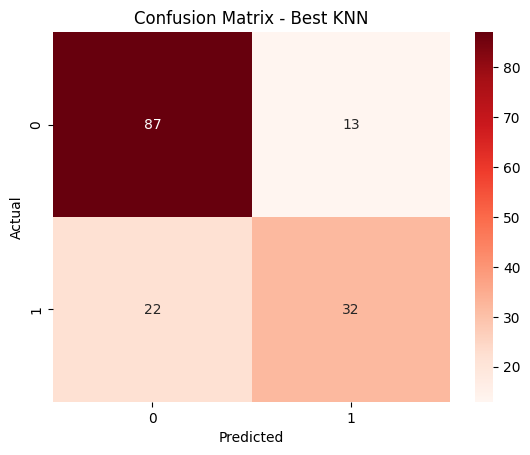

In [103]:
y_pred = best_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {acc:.4f}, F1-score: {f1:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
# plt.savefig('../../outputs/charts/nb1_confusion_matrix_best_knn.png', bbox_inches='tight')
plt.show()

- Sau khi điều chỉnh siêu tham số và đánh giá lại mô hình:
    - Các chỉ số tổng thể (accuracy, f1-score) và recall của lớp 1 đều giảm so với mô hình mặc định.
    - Việc giữ lại mô hình KNN mặc định sẽ cho kết quả tốt hơn.


### 2.3. Saving the Best Tuning Model <a id="save-tuned-model"></a>

In [102]:
joblib.dump(best_knn, '../../models/best_knn_tuning_model.pkl')
print('Saving the best model in models/best_knn_tuning_model.pkl')

Saving the best model in models/best_knn_tuning_model.pkl
